# Data check

In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = load_dataset("openai/gsm8k", "main")

In [8]:
print("Question: ", dataset['train']['question'][0].replace(". ", ".\n"))
print()
print("Answer: ", dataset['train']['answer'][0].replace(". ", ".\n"))

Question:  Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May.
How many clips did Natalia sell altogether in April and May?

Answer:  Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72


In [3]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")

In [8]:
# Train set
q_tokens = tokenizer.batch_encode_plus(dataset["train"]["question"])
a_tokens = tokenizer.batch_encode_plus(dataset["train"]["answer"])

n_tokens = {
    "n_q_tokens": [],
    "n_a_tokens": [],
}
for q, a in zip(q_tokens["input_ids"], a_tokens["input_ids"]):
    n_tokens["n_q_tokens"].append(len(q))
    n_tokens["n_a_tokens"].append(len(a))

n_q_tokens = np.array(n_tokens["n_q_tokens"])
n_q_tokens.sort()
n_a_tokens = np.array(n_tokens["n_a_tokens"])
n_a_tokens.sort()

n_q_tokens, n_a_tokens

(array([ 12,  18,  19, ..., 183, 184, 210]),
 array([ 23,  23,  23, ..., 319, 333, 362]))

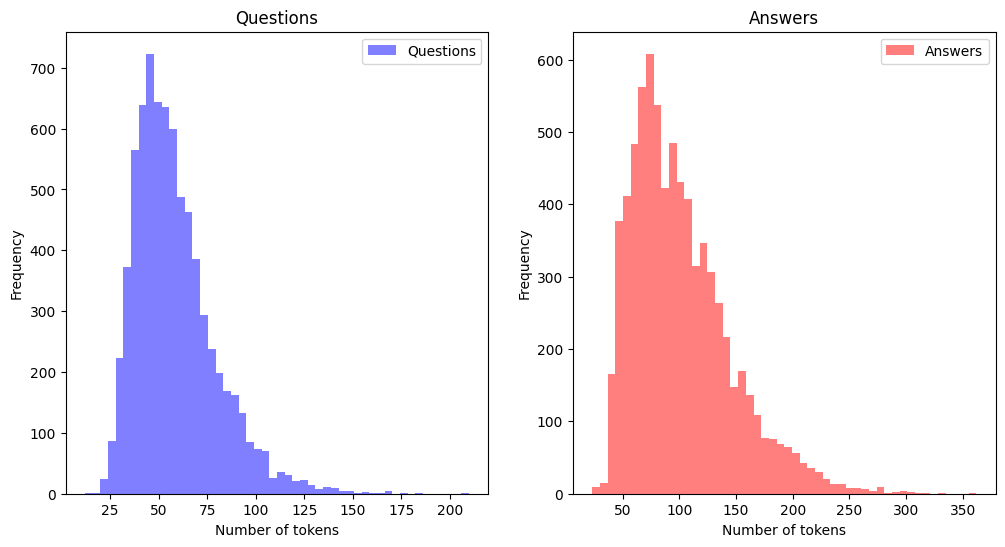

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(n_q_tokens, bins=50, color="blue", alpha=0.5, label="Questions")
axes[0].set_title("Questions")
axes[0].set_xlabel("Number of tokens")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].hist(n_a_tokens, bins=50, color="red", alpha=0.5, label="Answers")
axes[1].set_title("Answers")
axes[1].set_xlabel("Number of tokens")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.show()

In [6]:
# Test set
q_tokens = tokenizer.batch_encode_plus(dataset["test"]["question"])
a_tokens = tokenizer.batch_encode_plus(dataset["test"]["answer"])

n_tokens = {
    "n_q_tokens": [],
    "n_a_tokens": [],
}
for q, a in zip(q_tokens["input_ids"], a_tokens["input_ids"]):
    n_tokens["n_q_tokens"].append(len(q))
    n_tokens["n_a_tokens"].append(len(a))

n_q_tokens = np.array(n_tokens["n_q_tokens"])
n_q_tokens.sort()
n_a_tokens = np.array(n_tokens["n_a_tokens"])
n_a_tokens.sort()

n_q_tokens, n_a_tokens

(array([ 23,  24,  24, ..., 157, 163, 186]),
 array([ 23,  30,  32, ..., 277, 290, 311]))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(n_q_tokens, bins=50, range=(0, 100), color="blue", alpha=0.5, label="Questions")
axes[0].set_title("Questions")
axes[0].set_xlabel("Number of tokens")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].hist(n_a_tokens, bins=50, range=(0, 100), color="red", alpha=0.5, label="Answers")
axes[1].set_title("Answers")
axes[1].set_xlabel("Number of tokens")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.show()